# P1

In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, SparsePCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from skimage.exposure import equalize_hist
from skimage.filters import gaussian

%matplotlib inline

warnings.filterwarnings('ignore')

Let's show some images from dataset.

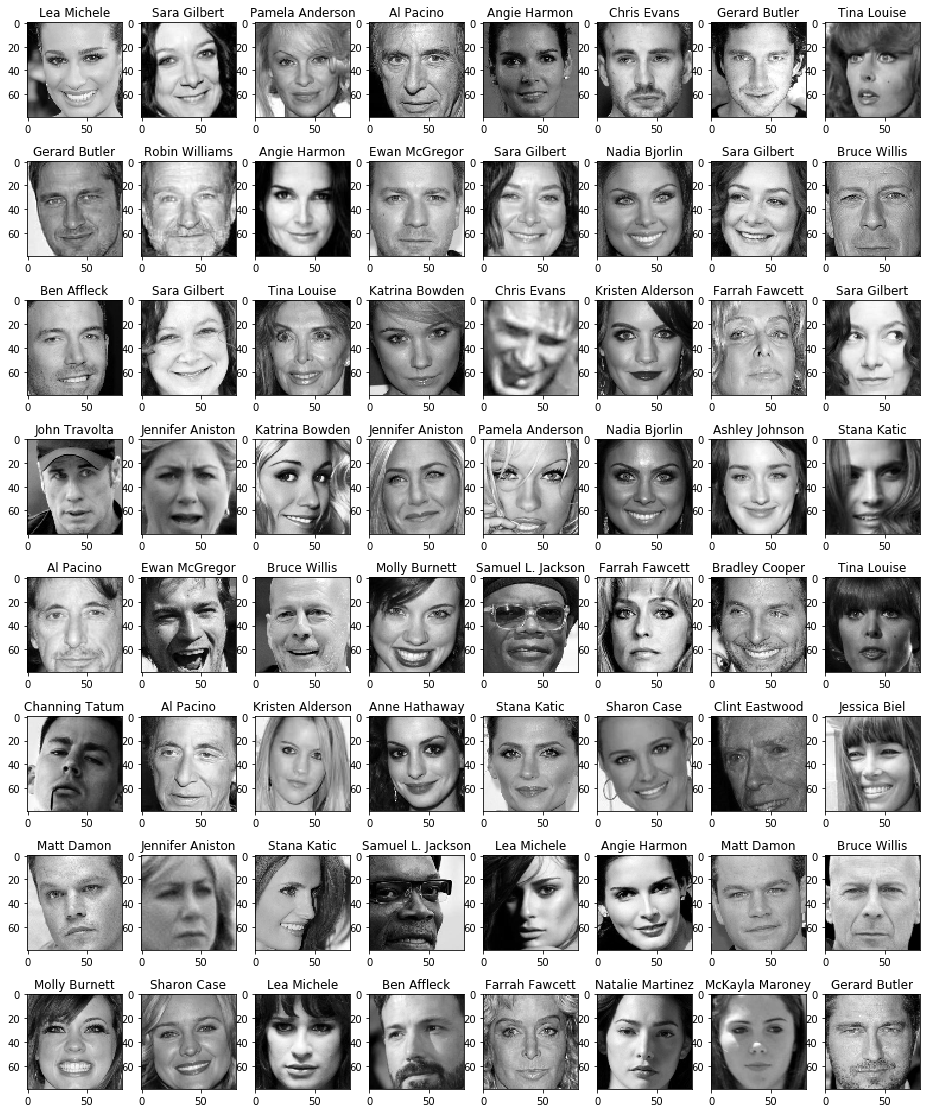

In [2]:
size = 80
shape =  2 * (size,)

X_train, y_train = shuffle(np.load('x_train.npy'), np.load('y_train.npy'))
X_test = np.load('x_test.npy')

width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, name) in enumerate(zip(X_train, y_train), 1):
    if n > width * height:
        break
        
    plt.subplot(height, width, n)
    plt.title(name)
    plt.imshow(image.reshape(shape), cmap='gray')

Define simple image preparing.

In [3]:
def prepare(img):
    img = img.reshape(shape)
    img = equalize_hist(img)
    img = gaussian(img, sigma=1)
    img - img.mean()
    
    return img.flatten()
    
def transform(X):
    height, width = X.shape
    for i in range(height):
        X[i] = prepare(X[i]) 
        
    return X

In [4]:
X_train = transform(X_train)
X_test = transform(X_test)

Use pca decomposition to reduce the dimensionality.

In [5]:
pca = PCA(n_components=200)
pca.fit(np.vstack([X_train, X_test]))

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Show some components.

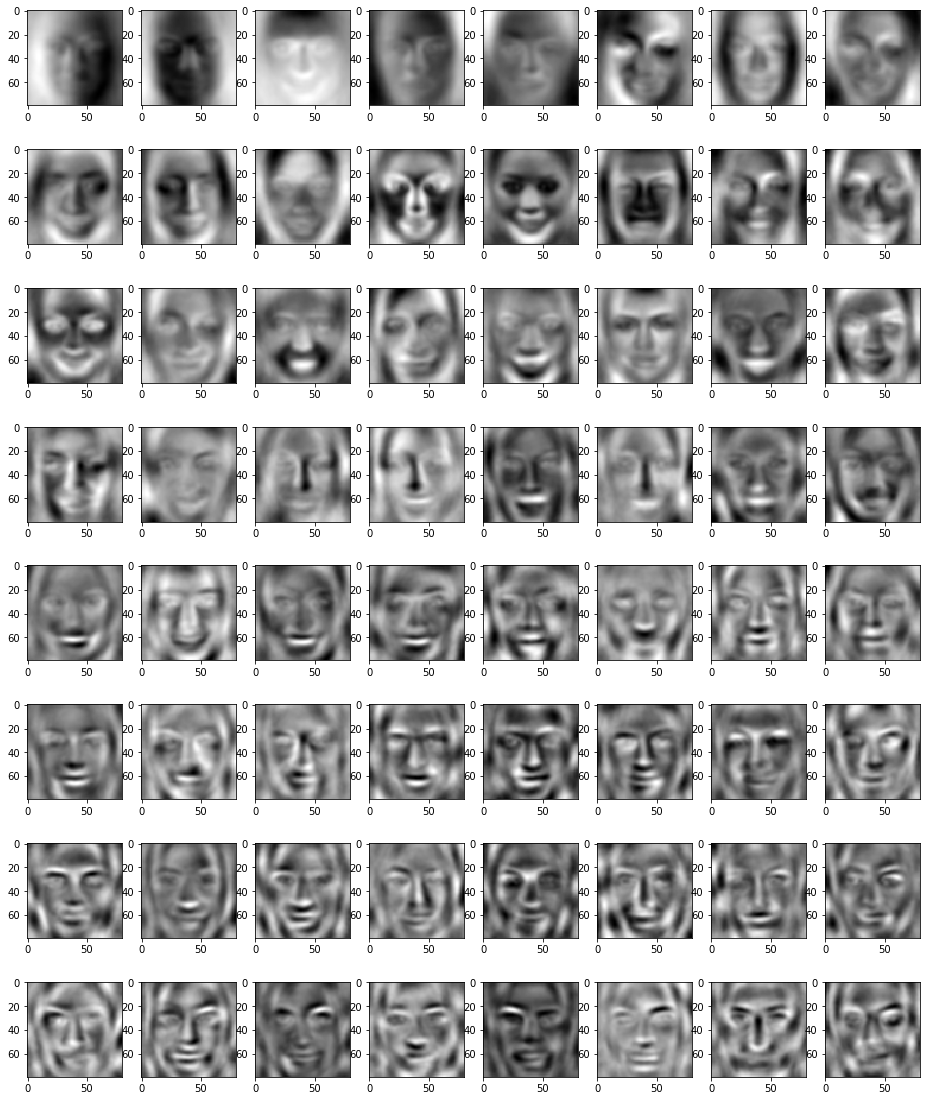

In [6]:
width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, component in enumerate(pca.components_, 1):
    if n > width * height:
        break
        
    plt.subplot(height, width, n)
    plt.imshow(component.reshape(shape), cmap='gray')

And in the end we use the nearest neighbors to classify faces.

In [7]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(pca.transform(X_train), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1.5,
           weights='uniform')

In [8]:
prediction= classifier.predict(pca.transform(X_test))

In [9]:
with open('prediction.csv', 'w') as out:
    print('Id,Name', file=out)
    for pair in enumerate(prediction, 1):
        print('%i,%s' % pair, file=out)